### Analyzing Industries of LA Out Migrators
*Contains plots of out migrator counts for top 7 & top 3 industries, as well as focus on health care & construction

In [1]:
import pandas as pd
import numpy as np
import altair as alt

In [2]:
file = pd.read_csv('ipums_clean.csv')

In [3]:
#Removing rows with NA's
file = file[file.IND_CAT.str.contains('N/A') == False]

In [4]:
file.IND_CAT.value_counts()

Retail Trade                                                3021
Health Care and Social Assistance                           2434
Educational Services                                        2423
Professional, Scientific, and Technical Services            2226
Accommodation and Food Services                             2218
Manufacturing                                               1985
Construction                                                1498
Other Services, Except Public Administration                1304
Administrative and support and waste management services    1283
Finance and Insurance                                       1127
Arts, Entertainment, and Recreation                          941
Transportation and Warehousing                               895
Information                                                  870
Public Administration                                        812
Active Duty Military                                         796
Wholesale Trade          

In [5]:
#Shortening description of some top 7 industries
file = file.replace({'Accommodation and Food Services':'Accom. & Food Services', 
                     'Professional, Scientific, and Technical Services':'Scientific & Tech Services', 
                     'Health Care and Social Assistance':'Health Care'})

-----

### Top 7 Industries

In [6]:
#Calculating annual out migration counts for top 7 industries
ind = {}
for year in range(2006,2018):
    df = file[file.YEAR == year]
    top7 = file.IND_CAT.value_counts()[:7].index
    counts = {}
    for category in top7:
        count = df.PERWT[df.IND_CAT == category].sum()
        counts[category] = count
    ind[year] = counts

In [7]:
#Creating data frame for altair plot
top_7 = pd.DataFrame()
for year in ind:
    df = pd.DataFrame.from_dict(ind[year], orient='index')
    df = df.reset_index()
    yr = np.full(len(df), str(year))
    df['Year'] = pd.to_datetime(yr)
    top_7 = pd.concat([top_7, df], sort=True)
top_7 = top_7.reset_index(drop=True)
top_7 = top_7.rename({'index':'Industry', 0:'Count'}, axis=1)

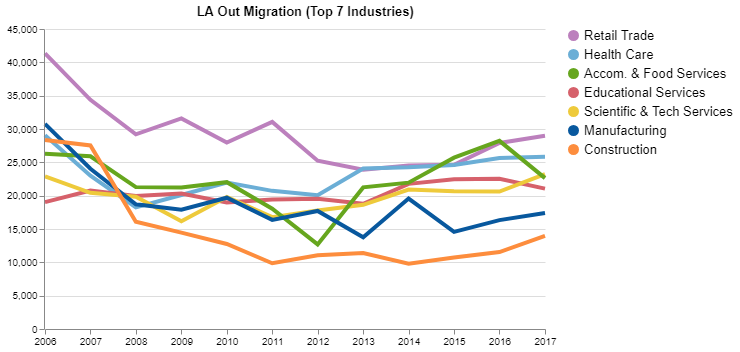

In [8]:
#Plotting top 7 via Altair
alt.Chart(top_7).mark_line(strokeWidth=4).encode(
    x=alt.X('year(Year)', 
            title=None, 
            axis=alt.Axis(labelFlush=False, grid=False)), 
    y=alt.Y('Count', 
            title=None, 
            axis=alt.Axis(offset=1)), 
    color=alt.Color('Industry', 
                    title=None,
                    scale=alt.Scale(range=['#bc80bd', '#6baed6', '#66a61e', '#d6616b', '#eeca3b', '#08589e', '#fd8d3d'], 
                                    domain=['Retail Trade', 'Health Care', 'Accom. & Food Services', 'Educational Services', 
                                            'Scientific & Tech Services', 'Manufacturing', 'Construction']),
)).properties(width=500, 
              title='LA Out Migration (Top 7 Industries)                                    '
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).configure_view(strokeWidth=0)

--------------------

### Top 3 Industries
*Contains 2 plots of the same data

In [9]:
#Calculating annual out migration counts for top 3 industries
counts = {}
for ind in file.IND_CAT.unique():
    count = file.PERWT[file.IND_CAT == ind].sum()
    counts[ind] = count

In [10]:
#Identifying the top 3
top3 = sorted(counts, key=counts.get, reverse=True)[:3]

In [11]:
top_3 = top_7[top_7.Industry.isin(top3)]

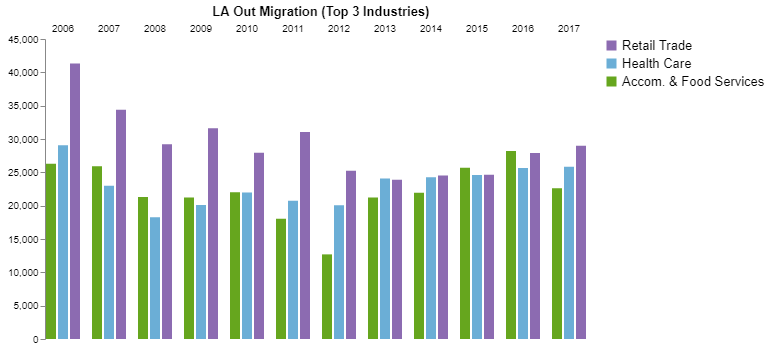

In [12]:
#Plotting via Altair
alt.Chart(top_3).mark_bar(size=10).encode(
    x=alt.X('Industry', 
            title=None, 
            axis=None, 
            scale=alt.Scale(rangeStep=12)),
    y=alt.Y('Count', 
            title=None,
            axis=alt.Axis(grid=False)),
    color=alt.Color('Industry', 
                    title=None,
                    scale=alt.Scale(domain=['Retail Trade', 'Health Care', 'Accom. & Food Services'], 
                                    range=['#8c6bb1', '#6baed6', '#66a61e'])),
    column=alt.Column('year(Year)', 
                      title=None)
).configure_view(strokeWidth=0
).configure_legend(labelFontSize=13
).properties(title='                                                         LA Out Migration (Top 3 Industries)')

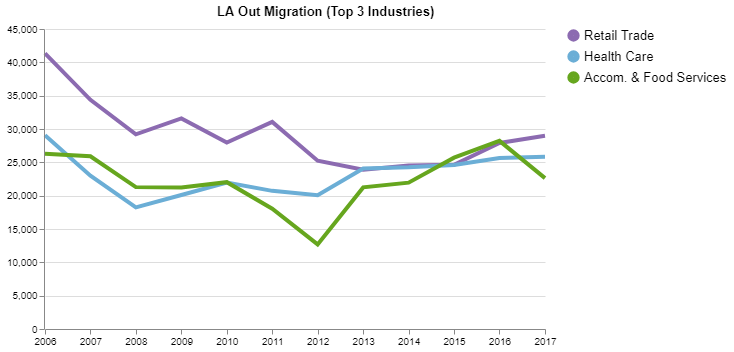

In [13]:
#Plotting same data in a line plot
alt.Chart(top_3).mark_line(strokeWidth=4).encode(
    x=alt.X('Year', 
            title=None, 
            axis=alt.Axis(labelFlush=False, grid=False)),
    y=alt.Y('Count', 
            title=None, 
            axis=alt.Axis(offset=1)),
    color=alt.Color('Industry', 
                    title=None,
                    scale=alt.Scale(domain=['Retail Trade', 'Health Care', 'Accom. & Food Services'], 
                                    range=['#8c6bb1', '#6baed6', '#66a61e']))
).configure_view(strokeWidth=0
).configure_legend(labelFontSize=13,
                   symbolStrokeWidth=6, 
                   symbolSize=40
).properties(width=500, 
             title='LA Out Migration (Top 3 Industries)                       ')

--------------------

### Health Care & Construction
*Contains 3 plots of the same data

In [14]:
#Extracting data for only health care & construction (from top_7 data frame)
health_con = top_7[top_7.Industry.isin(['Health Care', 'Construction'])]

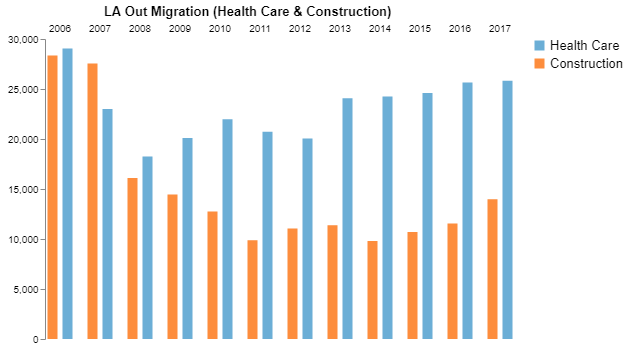

In [15]:
#Plotting via Altair
alt.Chart(health_con).mark_bar(size=10).encode(
    x=alt.X('Industry', 
            title=None, 
            axis=None, 
            scale=alt.Scale(rangeStep=12)),
    y=alt.Y('Count', 
            title=None,
            axis=alt.Axis(grid=False)),
    color=alt.Color('Industry', 
                    title=None, 
                    scale=alt.Scale(range=['#6baed6', '#fd8d3d'], 
                                    domain=['Health Care', 'Construction'])),
    column=alt.Column('year(Year)', 
                      title=None)
).configure_view(strokeWidth=0
).configure_legend(labelFontSize=13
).properties(width=30, 
             title='                           LA Out Migration (Health Care & Construction)')

In [16]:
#Base configuration for line & area charts
base = alt.Chart(health_con).encode(
    x=alt.X('Year', title=None, axis=alt.Axis(labelFlush=False, grid=False, )),
    y=alt.Y('Count', title=None, axis=alt.Axis(offset=1), stack=None),
    color=alt.Color('Industry',
                    title=None,
                    scale=alt.Scale(domain=['Health Care', 'Construction'], 
                                    range=['#6baed6', '#fd8d3d']))
).configure_view(strokeWidth=0
).configure_legend(labelFontSize=13, 
                   symbolStrokeWidth=5.5, 
                   symbolSize=30
).properties(width=500, 
             title='LA Out Migration (Health Care & Construction)                ')

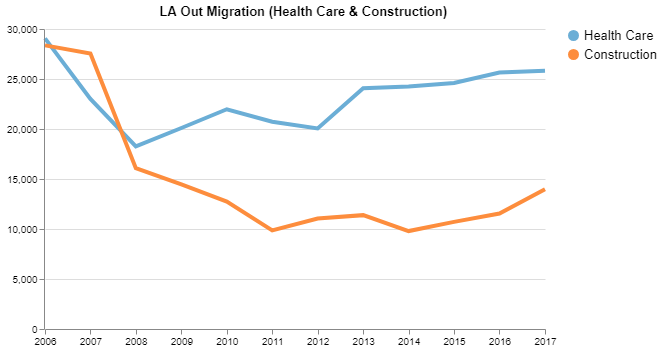

In [17]:
base.mark_line(strokeWidth=4)

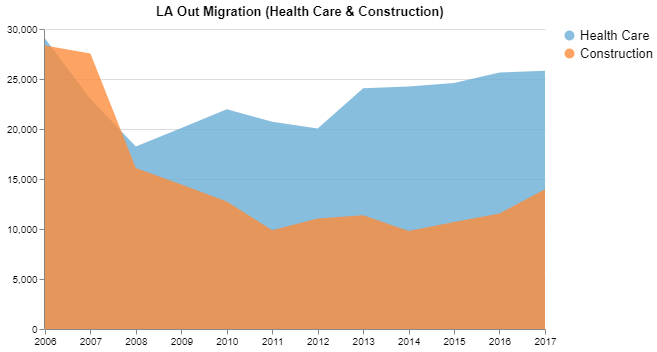

In [18]:
base.mark_area(opacity=0.8).configure_legend(titleFontSize=13, labelFontSize=13)